In [1]:
import numpy as np
from Metrics import get_percolation
import pickle

cuda


In [3]:
conc_lst = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

polarity_lst = ["w_non_polar", "only_polar"]
start_folder = "percolation_data/whole_range/"

polar_perc_vals = np.zeros((3,9))
non_polar_perc_vals = np.zeros((3,9))

for j,conc in enumerate(conc_lst):
    for polarity in polarity_lst:
        for i in range(3):
            data = np.load(start_folder + polarity + f"_conc{conc}_{i}/data.npy", allow_pickle=True)
            p_mask = data[0][-1]
            x      = data[1][-1]

            perc_prob = get_percolation(x, p_mask)
            if polarity == "w_non_polar":
                non_polar_perc_vals[i,j] = perc_prob
            else:
                polar_perc_vals[i,j] = perc_prob

In [4]:
np.save(start_folder + "perc_values.npy", (non_polar_perc_vals, polar_perc_vals), allow_pickle=True)

In [7]:
conc_lst = np.linspace(start=0.6, stop=0.99, num=10)

polarity_lst = ["w_non_polar", "only_polar"]
start_folder = "percolation_data/end_range/"

polar_perc_vals = np.zeros((3,10))
non_polar_perc_vals = np.zeros((3,10))

for j,conc in enumerate(conc_lst):
    for polarity in polarity_lst:
        for i in range(3):
            data = np.load(start_folder + polarity + f"_conc{conc}_{i}/data.npy", allow_pickle=True)
            p_mask = data[0][-1]
            x      = data[1][-1]

            perc_prob = get_percolation(x, p_mask)
            if polarity == "w_non_polar":
                non_polar_perc_vals[i,j] = perc_prob
            else:
                polar_perc_vals[i,j] = perc_prob

In [8]:
np.save(start_folder + "perc_values.npy", (non_polar_perc_vals, polar_perc_vals), allow_pickle=True)

### Reset and read data to avoid kernel crash

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# sns.set()

In [9]:
start_folder = "percolation_data/whole_range/"
non_polar_perc_vals, polar_perc_vals = np.load( start_folder + "perc_values.npy", allow_pickle=True)

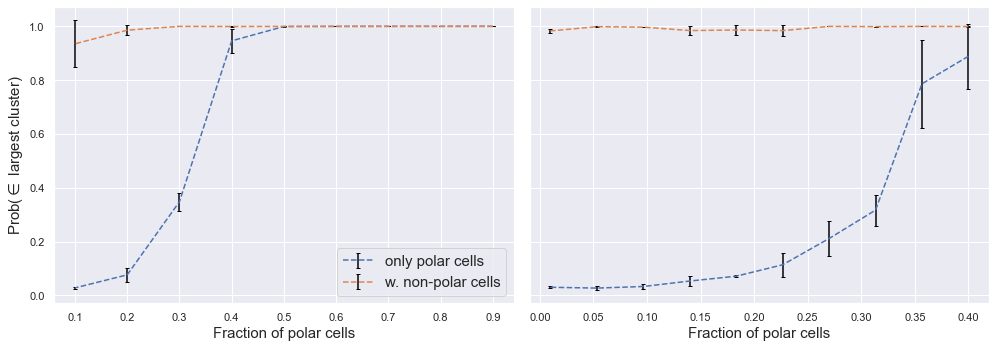

In [43]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(14,5), sharey=True, tight_layout=True)

conc_lst = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
start_folder = "percolation_data/whole_range/"
non_polar_perc_vals, polar_perc_vals = np.load( start_folder + "perc_values.npy", allow_pickle=True)
ax[0].errorbar(1-conc_lst, non_polar_perc_vals.mean(axis=0), non_polar_perc_vals.std(axis=0), label='w. non-polar cells', linestyle='--', ecolor='black', capsize=2)
ax[0].errorbar(1-conc_lst, polar_perc_vals.mean(axis=0), polar_perc_vals.std(axis=0), label='only polar cells', linestyle='--', ecolor='black', capsize=2)
ax[0].set_ylabel(f'Prob($\in$ largest cluster)', fontsize=15)
ax[0].set_xlabel('Fraction of polar cells', fontsize=15)
ax[0].legend(fontsize=15)

conc_lst = np.linspace(start=0.6, stop=0.99, num=10)
start_folder = "percolation_data/end_range/"
non_polar_perc_vals, polar_perc_vals = np.load(start_folder + "perc_values.npy", allow_pickle=True)
ax[1].errorbar(1-conc_lst, non_polar_perc_vals.mean(axis=0), non_polar_perc_vals.std(axis=0), linestyle='--', ecolor='black', capsize=2)
ax[1].errorbar(1-conc_lst, polar_perc_vals.mean(axis=0), polar_perc_vals.std(axis=0), linestyle='--', ecolor='black', capsize=2)
ax[1].set_xlabel('Fraction of polar cells', fontsize=15)

plt.show()



### Fine percolation plot

In [2]:
conc_lst = np.linspace(start=0.4, stop=0.99, num=50)

polarity     = "w_non_polar"
start_folder = "percolation_data/fine_end_range/"

perc_vals    = []

for conc in conc_lst:
    data = np.load(start_folder + polarity + f"_conc{conc}/data.npy", allow_pickle=True)
    p_mask = data[0][-1]
    x      = data[1][-1]

    perc_prob = get_percolation(x, p_mask)
    perc_vals.append(perc_prob)

In [3]:
np.save(start_folder + "perc_values.npy", np.array(perc_vals), allow_pickle=True)

In [3]:
conc_lst = np.linspace(start=0.4, stop=0.99, num=50)

polarity     = "w_non_polar"
start_folder = "percolation_data/fine_end_range/"

In [4]:
perc_vals = np.load( start_folder + "perc_values.npy", allow_pickle=True)

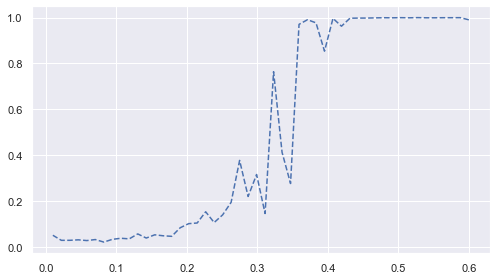

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(7,4), sharey=True, tight_layout=True)

ax.plot(1-conc_lst, perc_vals, label='w. non-polar cells', linestyle='--')
# ax[0].errorbar(1-conc_lst, polar_perc_vals.mean(axis=0), polar_perc_vals.std(axis=0), label='only polar cells', linestyle='--', ecolor='black', capsize=2)
# ax[0].set_ylabel(f'Prob($\in$ largest cluster)', fontsize=15)
# ax[0].set_xlabel('Fraction of polar cells', fontsize=15)
# ax.legend(fontsize=15)

In [134]:
sns.set_style('ticks')
sns.despine()

<Figure size 432x288 with 0 Axes>

In [155]:
from matplotlib import image
conc48_img = image.imread("plots/conc0.48.png")
conc09_img = image.imread("plots/conc0.09.png")
conc25_img = image.imread("plots/conc0.25.png")

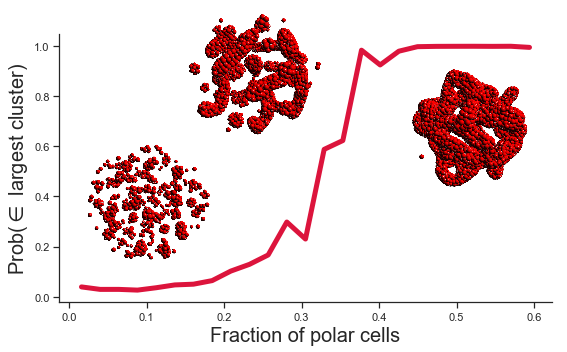

In [226]:
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
n = 2
new_perc = np.mean(perc_vals.reshape(-1,n), axis=1)
new_perc_std = np.std(perc_vals.reshape(-1,n), axis=1)
new_conc_lst = np.mean(conc_lst.reshape(-1,n), axis=1)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8,5), sharey=True, tight_layout=True)

ax.plot(1-new_conc_lst, new_perc, label='w. non-polar cells', linestyle='-', alpha=1, linewidth=5, color='crimson');
ax.set_xlabel('Fraction of polar cells', fontsize=20)
ax.set_ylabel(f'Prob($\in$ largest cluster)', fontsize=20)


imagebox = OffsetImage(conc48_img, zoom=0.21)
ab = AnnotationBbox(imagebox, (0.52,0.68), frameon=False)
ax.add_artist(ab)

imagebox = OffsetImage(conc09_img, zoom=0.21)
ab = AnnotationBbox(imagebox, (0.1,0.37), frameon=False)
ax.add_artist(ab)

imagebox = OffsetImage(conc25_img, zoom=0.21)
ab = AnnotationBbox(imagebox, (0.242,0.89), frameon=False)
ax.add_artist(ab)


sns.despine()

### Gridsearch percolation plot

In [1]:
size_lst = [1000, 2000, 4000, 8000, 10_000]
conc_lst = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [4]:
start_folder = "prolif_gridsearch_data/"

perc_arr = np.zeros((5, 9))

for i,size in enumerate(size_lst):
    for j,conc in enumerate(conc_lst):
        data = np.load(start_folder + f"size{size}_conc{conc}/data.npy", allow_pickle=True)
        p_mask = data[0][-1]
        x      = data[1][-1]

        perc = get_percolation(x, p_mask)

        perc_arr[i,j] = perc

In [2]:
start_folder = "prolif_gridsearch_data/"

In [5]:
np.save(start_folder + "perc_values.npy", perc_arr, allow_pickle=True)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
perc_arr = np.load(start_folder + "perc_values.npy")

Text(0.5, 1.0, 'Prob($\\in$ largest cluster), prolif rate 0.01')

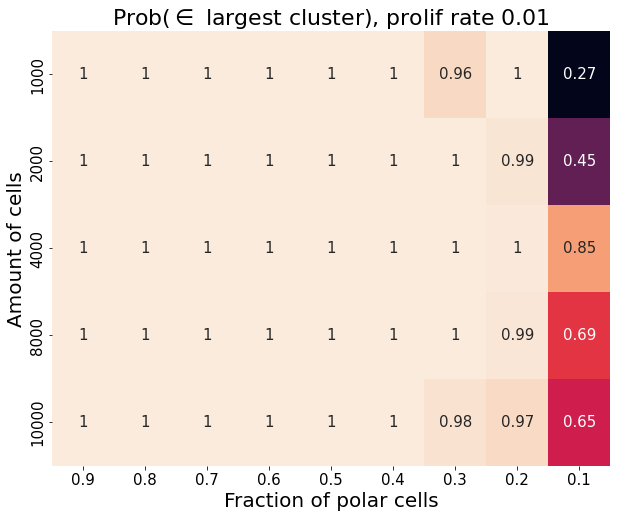

In [7]:
fig, ax = plt.subplots(figsize=(10,8))

ax =sns.heatmap(perc_arr, annot=True, xticklabels=np.round(1.-np.array(conc_lst),1), yticklabels=size_lst, annot_kws={"fontsize": 15 }, cbar=False)
ax.set_xlabel("Fraction of polar cells", fontsize=20)
ax.set_xticklabels(np.round(1.-np.array(conc_lst),1), fontsize=15)

ax.set_ylabel("Amount of cells", fontsize=20)
ax.set_yticklabels(size_lst, fontsize=15)

ax.set_title('Prob($\in$ largest cluster), prolif rate 0.01', fontsize=22)

In [269]:
size = 1_000
conc = 0.5

data = np.load(start_folder + f"size{size}_conc{conc}/data.npy", allow_pickle=True)
p_mask = data[0][-1]
x      = data[1][-1]

perc = get_percolation(x, p_mask)
print(perc)

0.174496644295302


### Percolation grid grid search search

In [9]:
size_lst = [2000, 4000, 8000]
conc_lst = [0.2, 0.4, 0.6, 0.8, 0.9]
polar_prolif_rates = [0.001, 0.0001, 0.00001]

In [4]:
start_folder = "prolif_grid_grid/"

perc_arr = np.zeros((3, 3, 5)) 
for i,size in enumerate(size_lst):
    for j,conc in enumerate(conc_lst):
        for k,rate in enumerate(polar_prolif_rates):
            data = np.load(start_folder + f"size{size}_conc{conc}_beta{rate}/data.npy", allow_pickle=True)
            
            p_mask = data[0][-1]
            x      = data[1][-1]

            perc = get_percolation(x, p_mask)

            perc_arr[k,i,j] = perc

In [5]:
np.save(start_folder + "perc_values_gridgrid.npy", perc_arr, allow_pickle=True)

In [6]:
import numpy as np
start_folder = "prolif_grid_grid/"
perc_arr_gridgrid = np.load(start_folder + "perc_values_gridgrid.npy")

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

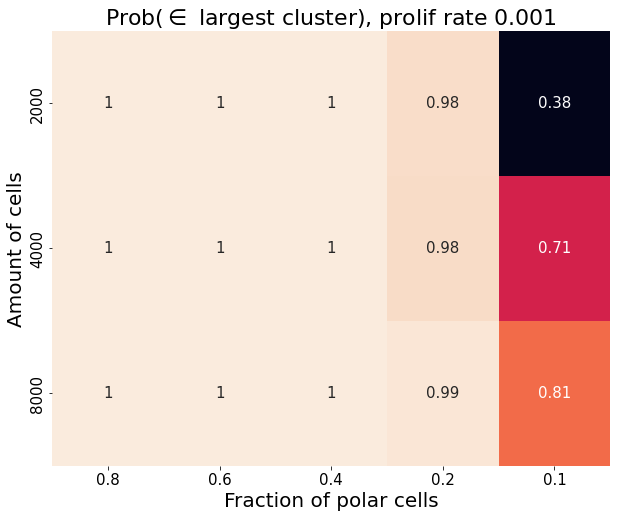

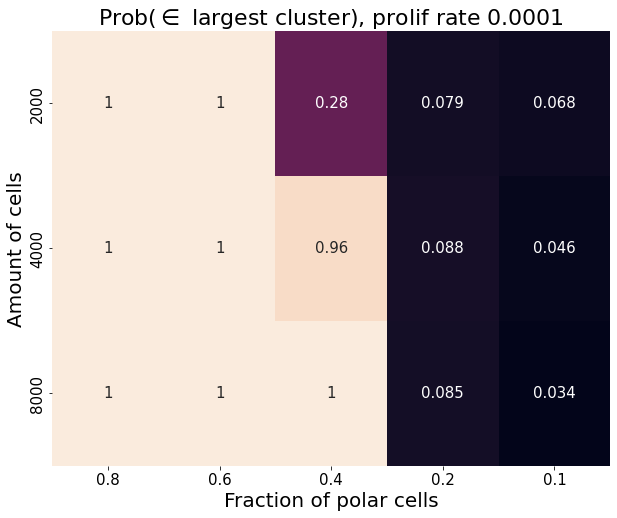

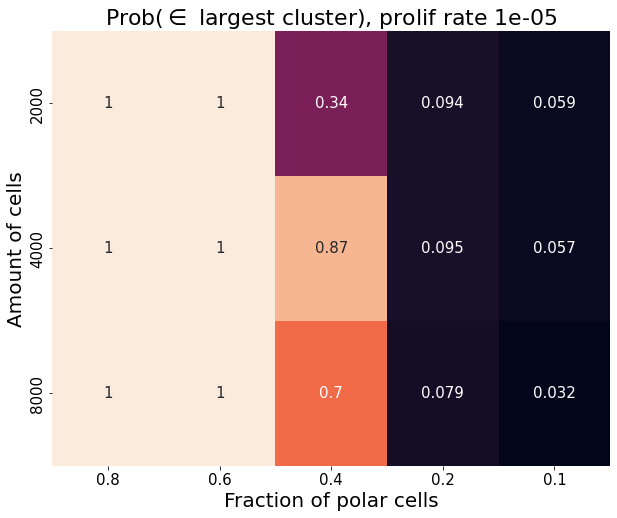

In [19]:
for (i,perc_arr) in enumerate(perc_arr_gridgrid):
    fig, ax = plt.subplots(figsize=(10,8))

    ax = sns.heatmap(perc_arr, annot=True, xticklabels=np.round(1.-np.array(conc_lst),1), yticklabels=size_lst, annot_kws={"fontsize": 15 }, cbar=False)
    ax.set_xlabel("Fraction of polar cells", fontsize=20)
    ax.set_xticklabels(np.round(1.-np.array(conc_lst),1), fontsize=15)

    ax.set_ylabel("Amount of cells", fontsize=20)
    ax.set_yticklabels(size_lst, fontsize=15)

    ax.set_title(f'Prob($\in$ largest cluster), prolif rate {polar_prolif_rates[i]:}', fontsize=22)